<center>
<img src="./img/confloss_logo.png" width="600px"/>

---
## Introdução a Análise Exploratória de Dados com Python
# ConFLOSS 2021
</center>

---

__Conteúdo:__

- Pandas - Parte I:
  - Visão Geral
  - Terminologia
  - Estruturas de Dados

- Medidas de Tendência Central - Parte II:
  - Média
  - Mediana
  - Moda
  - Outras médias
      - Média geométrica
      - Média harmônica

- Medidas de Dispersão - Parte III:
  - Amplitude
  - Variância
  - Desvio Padrão
  - Coeficiente de variação 
  - Medidas de posição relativa

- Visualização Gráfica - Parte IV:
- Correlação - Parte V:
- Estudo de Caso das Notas do ENEM 2019

## **Ferramentas e bibliotecas para análise exploratória de dados**

* [Google Colab ](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjRgtCVrqDqAhUUKLkGHc6jDnQQFjAAegQIARAC&url=https%3A%2F%2Fcolab.research.google.com%2F&usg=AOvVaw3A5aPK2kLFzKOzb6sOckVw): serviço de nuvem gratuito hospedado pelo Google para incentivar a pesquisa de Aprendizado de Máquina e Inteligência Artificial;
* Bibliotecas **Python**: **pandas**, **matplotlib**

### Referências sobre a biblioteca **pandas** e **matplotlib**:

* [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) é uma biblioteca para análise de dados em Python, de código aberto, licenciada por BSD, utiliza o conceito de dataframes que funcionam como uma matriz de dados, formada por linhas e colunas.

* Documentação da biblioteca [matplotlib](https://matplotlib.org/).

* Ciência de Dados com Reprodutibilidade usando Jupyter, disponível: https://doi.org/10.5753/sbc.6757.3.1

* Introdução a análise de dados com python e pandas, disponívei em: http://www.enucomp.com.br/2017/enucomp_anaisX_2017.pdf

* Introdução à Análise Exploratória de Dados com Python, disponível em https://ercas2019.enucompi.com.br/doc/livro_de_minicursos_ercas_pi_2019.pdf


### Bibliotecas necessárias para AED.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#need to set backe of matplotlib to inline to view visual in Jupyter Notebook
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

---
## Pandas - Parte I
---

O Pandas é uma biblioteca licenciada com código aberto que oferece estruturas de dados de alto desempenho e de fácil utilização voltado a análise de dados para a linguagem de programação Python.
- Transforma dados de entrada em uma tabela de dados
- Componentes chave
  - Series (Séries)
  - DataFrame

### Séries (Series)
- Objeto unidimensional do tipo array contendo dados e rótulos (labels) (ou índices), criado sobre o numpy
- Se um índice não for informado explicitamente, Pandas cria um automaticamente (equivalente a `range(N)`, sendo N é o tamanho dos seus dados)
- O índice é usado para implementar buscas rápidas, alinhamento de dados e operações de junção (como join em SQL)
- Suporta índices hierárquicos, onde cada label é uma tupla

In [3]:
# Criando uma série
my_serie = pd.Series([10,20,30,40,50])
print(my_serie)
print(my_serie[2])
my_serie.index = ['A', 'B', 'C', 'D', 'E']
print(my_serie)

0    10
1    20
2    30
3    40
4    50
dtype: int64
30
A    10
B    20
C    30
D    40
E    50
dtype: int64


- Conteúdos podem ser acessados via um ou mais índices

In [4]:
print(my_serie['A'])
print(my_serie[['C','E']])

10
C    30
E    50
dtype: int64


- slicing funciona para índices numéricos e nominais

In [5]:
print(my_serie[0])
print(my_serie[0:2])
print(my_serie['B':'E']) # slicing com índice nominal é inclusivo
                       # (último elemento é incluido na fatia)

10
A    10
B    20
dtype: int64
B    20
C    30
D    40
E    50
dtype: int64


- máscaras boolenas também podem ser usadas

In [6]:
mask = (my_serie >= 30)

print(my_serie[mask])

C    30
D    40
E    50
dtype: int64


In [7]:
mask

A    False
B    False
C     True
D     True
E     True
dtype: bool

- reindex
  - modifica o valor do índice, adiciona valores faltantes ou preenche valores faltantes

In [8]:
s = pd.Series(np.arange(3)) # neste caso o indice é criado automaticamente
print('original')
print(s)

print('\nreindexado')
s_nan = s.reindex([4,3,2,1,0])
print(s_nan)

original
0    0
1    1
2    2
dtype: int64

reindexado
4    NaN
3    NaN
2    2.0
1    1.0
0    0.0
dtype: float64


In [9]:
print('\n reindexado (tratando valores faltantes, método 1)')
s_fvalue = s.reindex([4,3,2,1,0], fill_value=-1)
print(s_fvalue)

print('\nreindexado (tratando valores faltantes, método 2)')
s_auto = s.reindex([3,2,1,0,5,6], method='nearest')
print(s_auto)


 reindexado (tratando valores faltantes, método 1)
4   -1
3   -1
2    2
1    1
0    0
dtype: int64

reindexado (tratando valores faltantes, método 2)
3    2
2    2
1    1
0    0
5    2
6    2
dtype: int64


- Operações aritméticas (realizada de acordo com o "match" dos indices)

In [10]:
print(s_fvalue) 
print(s_auto) 
print(s_fvalue + s_auto)

4   -1
3   -1
2    2
1    1
0    0
dtype: int64
3    2
2    2
1    1
0    0
5    2
6    2
dtype: int64
0    0.0
1    2.0
2    4.0
3    1.0
4    NaN
5    NaN
6    NaN
dtype: float64


- é possívle organizar os elementos de uma série pelo índice ou pelos valores

In [11]:
r = pd.Series(np.random.rand(4), index=['d','a','b','c'])
print(r)
print(r.sort_index())
print(r.sort_values())

d    0.209534
a    0.710767
b    0.638771
c    0.377942
dtype: float64
a    0.710767
b    0.638771
c    0.377942
d    0.209534
dtype: float64
d    0.209534
c    0.377942
b    0.638771
a    0.710767
dtype: float64


- Há muitos métodos implementados para operar nos valores. Alguns exemplo, são:
  - unique()
  - value_counts()
  - isin()
  - ...(muito mais na parte II, próxima aula)

In [12]:
s = pd.Series(['c','a','d','a','a','b','b','c','c'])
print(s.unique())
print(s.value_counts())
print(s.isin(['b','d']))

['c' 'a' 'd' 'b']
a    3
c    3
b    2
d    1
dtype: int64
0    False
1    False
2     True
3    False
4    False
5     True
6     True
7    False
8    False
dtype: bool


In [13]:
dir(s)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__

### DataFrames
Dataframe é uma estrutura de dados tabular bidimensional e mutável em tamanho, potencialmente heterogênea, com eixos rotulados (linhas e colunas).
- Possui índices de linhas e colunas
- Pode ser interpretado como um dicionário de Séries (cada série em uma linha) em que todas as Séries compartilham o mesmo conjunto de índices (os índices das colunas)

Dataframes podem ser criados de muitas maneiras diferentes:
- __2-D NumPy array:__ Uma matriz de dados, podendo passar os índices de linha e coluna
- __Dict of arrays, lists, or tuples:__ Cada sequência se torna uma coluna. As sequências devem ter o mesmo número de elementos
- __Dict of Series:__ Cada séries se torna uma coluna. Índices de cada séries são unidos para formar o índice das linhas
- __Dict of dicts:__ Cada dicionário se torna uma coluna. Chaves dos dicionários se unem para formar os índices das linhas
- __List of dicts or Series:__ Cada item se torna uma linha no DataFrame. A unidão das chaves (para dicionário) ou índices (para Séries) gera o índice das colunas
- __List of lists or tuples:__	Similar a uma matriz do numpy
- __DataFrame:__ O índice do DataFrame é mantido a não ser que um novo seja fornecido 
- __NumPy masked array:__ Matriz de dados em que valores falso se tornam NaN


In [14]:
# intialise data of lists.
data = {
    'Name': ['Tom', 'nick', 'krish', 'jack'],
    'Age' : [20, 21, 19, 18]
}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


**Atenção:** Duas funções são muito úteis para analisar rapidamente um novo DataFrame: df.head() e df.dtypes()

In [15]:
df.head(2)

,Name,Age
0,Tom,20
1,nick,21


In [16]:
df.dtypes

Name    object
Age      int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


#### Manipulando e Acessando Colunas

- Colunas podem ser acessadas:
  - usando seus rótulos dentro de []
  - usando rótulo como atributo
  - usando lista de rótulos dentro de [] (acessa várias colunas)

In [18]:
# Criando um dataframe com um dicionário de listas
d = {
    'state' :  ['FL', 'FL', 'GA', 'GA', 'GA'],
    'year'  :  [2010, 2011, 2008, 2010, 2011],
    'pop'   :  [18.8, 19.1, 9.7, 9.7, 9.8]
}

df_d = pd.DataFrame(d)
df_d

,state,year,pop
0,FL,2010,18.8
1,FL,2011,19.1
2,GA,2008,9.7
3,GA,2010,9.7
4,GA,2011,9.8


In [19]:
print(df_d.columns.values)  # imprime o nome das colunas
print(5*'-')
print(df_d['pop'])
print(5*'-')
print(df_d.state)
print(5*'-')
print(df_d[['pop','year']])

['state' 'year' 'pop']
-----
0    18.8
1    19.1
2     9.7
3     9.7
4     9.8
Name: pop, dtype: float64
-----
0    FL
1    FL
2    GA
3    GA
4    GA
Name: state, dtype: object
-----
    pop  year
0  18.8  2010
1  19.1  2011
2   9.7  2008
3   9.7  2010
4   9.8  2011


- Colunas podem ser criadas simplesmente criando um novo rótulo
- Colunas podem ser removidas usando o método `drop` ou `del`

In [20]:
print(df_d)
# criando uma nova coluna
df_d['new_col'] = np.zeros((df_d.shape[0])) # o comando shape funciona como no numpy
print(df_d)
# removendo a nova coluna
df_d_new = df_d.drop(['new_col'], axis=1) # OU del df_d['new_col']
print(df_d_new)

  state  year   pop
0    FL  2010  18.8
1    FL  2011  19.1
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8
  state  year   pop  new_col
0    FL  2010  18.8      0.0
1    FL  2011  19.1      0.0
2    GA  2008   9.7      0.0
3    GA  2010   9.7      0.0
4    GA  2011   9.8      0.0
  state  year   pop
0    FL  2010  18.8
1    FL  2011  19.1
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8


In [21]:
df_d_new

,state,year,pop
0,FL,2010,18.8
1,FL,2011,19.1
2,GA,2008,9.7
3,GA,2010,9.7
4,GA,2011,9.8


In [22]:
df_d.drop(['new_col'], axis=1, inplace=True)

In [23]:
df_d

,state,year,pop
0,FL,2010,18.8
1,FL,2011,19.1
2,GA,2008,9.7
3,GA,2010,9.7
4,GA,2011,9.8


#### Manipulando e Acessando Linhas

- linhas podem ser acessadas usando:
  - iloc: manipula o DataFrame como uma matriz com índices inteiros, assim como no Numpy
  - loc: seleciona linhas pelos rótulos (índices) ou por máscara booleana

In [24]:
print(df_d)
print(5*'-')
print(df_d.iloc[2]) # retorna uma linha como uma série (rótulo da linha se torna o rótulo de coluna)
print(5*'-')
print(type(df_d.iloc[2]))
print(5*'-')
print(df_d.iloc[2:4,1:])  
print(5*'-')
print(type(df_d.iloc[2:4,1:]))

  state  year   pop
0    FL  2010  18.8
1    FL  2011  19.1
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8
-----
state      GA
year     2008
pop       9.7
Name: 2, dtype: object
-----
<class 'pandas.core.series.Series'>
-----
   year  pop
2  2008  9.7
3  2010  9.7
-----
<class 'pandas.core.frame.DataFrame'>


In [25]:
# Criando um dataframe com um dicionário de dicionários
dod = {'FL' : {2010:18.1, 2011:19.1},
       'GA' : {2008: 9.7, 2010: 9.7, 2011:9.8}}

df_dod = pd.DataFrame(dod)
print(df_dod)

        FL   GA
2010  18.1  9.7
2011  19.1  9.8
2008   NaN  9.7


In [26]:
print(df_dod)
print()
print(df_dod.loc[2008])
print()
print(df_dod.loc[[2010, 2011]])
print()
print(df_dod.loc[df_dod['GA'] == 9.7]) # loc aceita expressoes booleanas

        FL   GA
2010  18.1  9.7
2011  19.1  9.8
2008   NaN  9.7

FL    NaN
GA    9.7
Name: 2008, dtype: float64

        FL   GA
2010  18.1  9.7
2011  19.1  9.8

        FL   GA
2010  18.1  9.7
2008   NaN  9.7


In [27]:
# as expressoes booleanas podem ser combinadas
# & é o operador lógico AND
# Existe também o operador lógico OR | (barra vertical)
print(df_d.loc[(df_d['state'] == 'GA') & (df_d['year'] >= 2010)])

  state  year  pop
3    GA  2010  9.7
4    GA  2011  9.8


In [28]:
# retornando uma lista tipo 'mascara booleana'
print('cond 1')
print(df_d['state'] == 'GA') 

print('\ncond 2')
print(df_d['year'] >= 2010)

print('\nand (&)')
print((df_d['state'] == 'GA') & (df_d['year'] >= 2010))

print('\nor (&)')
print((df_d['state'] == 'GA') | (df_d['year'] >= 2010))

cond 1
0    False
1    False
2     True
3     True
4     True
Name: state, dtype: bool

cond 2
0     True
1     True
2    False
3     True
4     True
Name: year, dtype: bool

and (&)
0    False
1    False
2    False
3     True
4     True
dtype: bool

or (&)
0    True
1    True
2    True
3    True
4    True
dtype: bool


In [29]:
# Uma outra forma é utilizar a função query
print(df_d.query("state == 'GA' and year >= 2010"))

  state  year  pop
3    GA  2010  9.7
4    GA  2011  9.8


- Assim como nas Séries, também é possível ordernar por índice, mas ao ordernar por valor é necessário definir a coluna

In [30]:
df_d.sort_values('year')

,state,year,pop
2,GA,2008,9.7
0,FL,2010,18.8
3,GA,2010,9.7
1,FL,2011,19.1
4,GA,2011,9.8


In [31]:
df_d.sort_values('pop')

,state,year,pop
2,GA,2008,9.7
3,GA,2010,9.7
4,GA,2011,9.8
0,FL,2010,18.8
1,FL,2011,19.1


**Atenção:** sort_values, gera uma cópia. Para modificar o DataFrame, deve-se passar o parâmetro `inplace = True`

In [32]:
print(df_d.sort_values('pop'))
print(df_d)
df_d.sort_values('pop',inplace=True)
print(df_d)

  state  year   pop
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8
0    FL  2010  18.8
1    FL  2011  19.1
  state  year   pop
0    FL  2010  18.8
1    FL  2011  19.1
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8
  state  year   pop
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8
0    FL  2010  18.8
1    FL  2011  19.1


## Carregando arquivos
Pandas permite diversas maneiras de carregas arquivos:
- Arquivos de texto
- Dados estruturados (JSON, XML, HTML, CSV)
- Excel (depende das biblitoecas xlrd e  openpyxl)
- Direto de base de dados
  - pandas.io.sql  (read_frame)

In [33]:
pnad_df = pd.read_csv("https://raw.githubusercontent.com/gesielrios/AED-ERCAS-ENUCOMPI-2019/master/pnad.csv")
pnad_df.head()

,uf,tipo_area,sexo,idade,cor,pessoas_dom,freq_esc,nivel_instrucao,ocup_forca,trab_procurou,...,ocup_grupo,ocup_pos,ocup_pos2,carteira,ativ_cod,ativ_grupo,prev,ocup_horas,rendimento,rendimento_total
0,41,4,feminino,28,4,2,2.0,fundamental_inc,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33,4,masculino,51,2,5,2.0,fundamental_inc,1.0,NaN,...,6.0,2.0,3.0,1.0,97000.0,11.0,1.0,4.0,937.0,937.0
2,35,2,masculino,57,1,3,2.0,fundamental_inc,1.0,NaN,...,7.0,5.0,9.0,NaN,45020.0,4.0,1.0,5.0,3000.0,3000.0
3,53,1,masculino,14,1,7,1.0,fundamental_inc,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27,2,masculino,28,4,2,2.0,sem_instrucao,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
bolsa_df = pd.read_csv('https://raw.githubusercontent.com/gesielrios/AED-ERCAS-ENUCOMPI-2019/master/bolsa.csv')
bolsa_df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2014.06.13,54800,55155,54665,54940,679300,177772,5
1,2014.06.16,55135,55170,54515,54780,613450,164375,5
2,2014.06.17,54750,54940,54130,54215,411590,114115,5
3,2014.06.18,55100,56065,54820,56065,804810,203470,5
4,2014.06.20,55710,55775,55250,55505,677370,171775,5


In [35]:
pnad_df.shape

(10000, 25)

In [36]:
pnad_df['sexo'].value_counts()

feminino     5096
masculino    4904
Name: sexo, dtype: int64

## **Medidas Estatísticas**

* As **medidas de tendência** central mostram o valor representativo
em torno do qual os dados tendem a agrupar-se, dão o ponto
central em torno do qual os dados se distribuem;
* As **medidas de dispersão** mostram o grau de afastamento dos
valores observados em relação ao ponto central da distribuição dos
dados;
* As **medidas de posição relativa** mostram pontos de corte na
distribuição relativa dos dados da amostra.

**Análise univariada**

A análise univariada consiste em analisar **cada** variável da amostra:
* Classificar o seu tipo: **qualitativa** (nominal ou ordinal) ou **quantitativa** (discreta ou contínua);

* Obter tabelas, gráficos e/ou medidas que **resumam** a variável;

* A partir destes resultados pode-se montar um **resumo geral** dos dados.

**Variáveis**

Quando fazemos uma amostragem, coletamos não apenas a informação sobre a característica de interesse, mas diversas outras informações que auxiliarão no entendimento desta característica.

**Cada** uma das **características** da população amostrada, como peso, altura, sexo ou idade, é denominada de uma **variável**.

As variáveis podem assumir diferentes valores, que basicamente podem ser **separados** em

* **Quantitativos** ou numéricos
* **Qualitativos** ou não numéricos, ou categóricos

<br>
<p align="center"><img src="./img/variaveis.png
"></p>

**Classificação de variáveis**

**As variáveis quantitativas ou numéricas podem ser**

* **Discretas**: assumem apenas valores inteiros. Ex.: número de irmãos, número de passageiros;
* **Contínuas**: assume qualquer valor no intervalo dos números reais. Ex.: peso, altura.

**As variáveis qualitativas ou categóricas podem ser**

* **Nominais**: quando as categorias não possuem uma ordem natural. Ex.: nomes, cores, sexo;
* **Ordinais**: quando as categorias podem ser ordenadas. Ex.: tamanho (pequeno, médio, grande), classe social (baixa, média, alta), grau de instrução (básico, médio, graduação, pós-graduação).

---
# Medidas de Tendência Central - Parte II
---
As medidas de tendência central ou "de posição" procuram caracterizar a tendência do conjunto (valor "típico") a um valor numérico que "represente" o conjunto. Esse valor pode ser calculado levando em conta todos os valores do conjunto ou apenas alguns valores ordenados.

## Média
A média aritmética simples é a soma dos valores observados dividida pelo número desses valores, definida da seguinte forma:

$$\overline{x} = \frac{x_{1} + x_{2} + \ldots + x_{n}}{n} = \frac{\displaystyle\sum_{i=1}^{n} x_{i}}{n}$$

- Existem duas formas de se calcular a média.

In [37]:
pnad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uf                10000 non-null  int64  
 1   tipo_area         10000 non-null  int64  
 2   sexo              10000 non-null  object 
 3   idade             10000 non-null  int64  
 4   cor               10000 non-null  int64  
 5   pessoas_dom       10000 non-null  int64  
 6   freq_esc          9342 non-null   float64
 7   nivel_instrucao   9342 non-null   object 
 8   ocup_forca        7991 non-null   float64
 9   trab_procurou     3839 non-null   float64
 10  motivo_ntrab      3283 non-null   float64
 11  serv_pub          407 non-null    float64
 12  ocup_cond         4708 non-null   float64
 13  ocup_desc         4151 non-null   object 
 14  ocup_cod          4152 non-null   float64
 15  ocup_grupo        4152 non-null   float64
 16  ocup_pos          4152 non-null   float64

In [38]:
pnad_df.columns

Index(['uf', 'tipo_area', 'sexo', 'idade', 'cor', 'pessoas_dom', 'freq_esc',
       'nivel_instrucao', 'ocup_forca', 'trab_procurou', 'motivo_ntrab',
       'serv_pub', 'ocup_cond', 'ocup_desc', 'ocup_cod', 'ocup_grupo',
       'ocup_pos', 'ocup_pos2', 'carteira', 'ativ_cod', 'ativ_grupo', 'prev',
       'ocup_horas', 'rendimento', 'rendimento_total'],
      dtype='object')

In [39]:
pnad_df['idade'].sum()

342846

In [40]:
type(pnad_df['idade'])

pandas.core.series.Series

In [41]:
len(pnad_df['idade'])

10000

In [42]:
media_idade = pnad_df['idade'].sum() / len(pnad_df['idade'])
print(media_idade)

34.2846


In [43]:
pnad_df['idade'].mean()

34.2846

In [44]:
pnad_df['rendimento']

0          NaN
1        937.0
2       3000.0
3          NaN
4          NaN
         ...  
9995       NaN
9996     150.0
9997     200.0
9998       NaN
9999       NaN
Name: rendimento, Length: 10000, dtype: float64

**Atenção:** Tenha certeza que não exista na coluna valores nulos.

In [45]:
media_rendimento = pnad_df['rendimento'].sum() / len(pnad_df['rendimento'])
print(media_rendimento)

724.8113


In [46]:
pnad_df['rendimento'].mean()

1823.8834927025666

In [47]:
10000 - 3974

6026

## Mediana
A mediana é o valor médio ou a média aritmética de dois valores centrais de um conjunto de números ordenados (crescente ou decrescente).

In [48]:
pnad_df['idade'].median()

32.0

In [49]:
pnad_df['rendimento'].median()

1200.0

#### **Média *X* Mediana**

É sempre necessário observar ambas as medidas, cada medida depende diretamente de como estão distribuídos os dados. No Exemplo a seguir iremo utilizar dois exemplos de conjuntos de dados.

Conjunto1 = [1,2,3,4,5]

Conjunto2 = [1,2,3,4,50]

A seguir iremos aplicar o cálculo da média e da mediana para ambos os conjuntos.

In [50]:
# conjunto de dados
Conjunto1 = [1,2,3,4,5]
Conjunto2 = [1,2,3,4,50]

In [51]:
#média para o primeiro conjunto de dados
pd.Series(Conjunto1).mean()

3.0

In [52]:
#mediana para o primeiro conjunto de dados
pd.Series(Conjunto1).median()

3.0

In [53]:
#média para o segundo conjunto de dados
pd.Series(Conjunto2).mean()

12.0

In [54]:
#mediana para o segundo conjunto de dados
pd.Series(Conjunto2).median()

3.0

As duas amostras se diferenciam apenas pelo **último valor**, foi inserido um valor discrepante, chamado de **outlier**. Um *outlier* é um valor que é muito diferente dos demais, quando presentes na amostra, esses valores acabam por "contaminar" a **MÉDIA**.

O outlier distorce a média, devido a este problema, quando for escolher uma medida de tendência central, é importante analisar os dados, se a média e a mediana estiverem próximas é possível que não existam valores discrepantes na amostra.

Se **não houverem valores discrepantes** na amostra a melhor escolha é a **média**, mas ainda assim é importante calcular a mediana e analisar os dois valores.

Caso **existam valores discrepantes** o melhor usar a **mediana**.

É importante entender os valores discrepantes. Nem sempre um valor discrepante é um erro nos dados. Caso seja um erro, esse valor deverá ser eliminado da amostra e refeito os cálculos da média e mediana, analisando novamente os dois valores. Se o valor não for um erro, deve-se analisar os valores de informa separada, pois esses valores podem ser exatamente o que se busca na amostra. 

A mediana deve ser usada, sempre que possível, como medida representativa de distribuições fortemente assimétricas, como por exemplo a variável distribuição de renda.

## Moda
A moda é o valor que ocorre com maior frequência em um dado conjunto de dados.

In [55]:
pnad_df['idade'].mode()

0    16
dtype: int64

In [56]:
pnad_df['rendimento'].mode()

0    937.0
dtype: float64

**Atenção:** A moda pode não existir

In [57]:
bolsa_df['VOL'].mode()

0         54025
1        114115
2        122051
3        127517
4        145136
         ...   
1256    7403535
1257    7414313
1258    7416304
1259    7536126
1260    7634894
Length: 1261, dtype: int64

## Outras médias
Algumas vezes é interessante calcular médias de forma diferente para dados com características especiais.

### Média Geométrica
As médias geométricas são bastante empregadas para observações positivas referentes a crescimentos exponenciais, definida da seguinte forma:

$$ G = \sqrt[n]{x_{1} \times x_{2} \times \ldots \times x_{n}} = \sqrt[n]{\prod_{i=1}^{n} x_{i}} $$

### Média Harmônica
Para fenômenos que dependem fortemente do menor dos dados, em geral, utiliza-se médias harmônicas calculadas como o inverso da média dos inversos de um conjunto de dados, definida da seguinte forma:

$$ H = \frac{1}{\frac{\displaystyle \frac{1}{x_{1}} + \frac{1}{x_{2}} +\ldots + \frac{1}{x_{n}}}{\displaystyle n}} = \frac{n}{\displaystyle \sum_{i=1}^{n}\frac{1}{x_{i}}} $$

Para o cálculo das médias geometricas e harmônicas utilizaremos as funções $gmean()$ e $hmean()$, respectivamente, do módulo $scipy.stats$ da biblioteca SciPy . O módulo $scipy.stats$ contém um grande número de distribuições de probabilidade, bem como uma crescente biblioteca de funções estatísticas.


In [58]:
#importanto o modulo do scipy para calculo da media geometrica e harmonica
from scipy import stats

#Definindo o dataset para o calculo da media geometrica e harmonica
var = {
    't1':[2,6,15,59],
    't2':[2000,20,250,1500]
}
other_means_df = pd.DataFrame(var)

other_means_df.head()

,t1,t2
0,2,2000
1,6,20
2,15,250
3,59,1500


In [59]:
#calculo da media geometrica
geometric_mean = stats.gmean(other_means_df['t1'], axis=0)
print("Media Geometrica:", geometric_mean)

#calculo da media harmonica
harmonic_mean = stats.hmean(other_means_df['t2'],axis=0)
print("Media Harmonica:", harmonic_mean)

Media Geometrica: 10.151521276336176
Media Harmonica: 72.50755287009062


In [60]:
dir(stats)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_ksstats',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_c

---
# Medidas de Dispersão ou Variabilidade - Parte III
---

As medidas de dispersão ou variabilidade indicam se os valores de conjunto de dados estão relativamente próximos uns dos outros, ou separados. Todas elas têm na média o ponto de referência.

## Amplitude
A amplitude ou intervalo total ($I_{t}$) de um conjunto de dados ($x_{1}, x_{2},\ldots,x_{n}$) é a diferença entre o maior valor e o menor valor, definido da seguinte forma:

$$ I_{t} = x_{max} - x_{min}, $$

onde

$x_{max} = $ valor máximo do conjunto de dados, isto é, $max\{x_{1}, x_{2},\ldots,x_{n}\}$;

$x_{min} = $ valor mínimo do conjunto de dados, isto é, $min\{x_{1}, x_{2},\ldots,x_{n}\}$.

In [61]:
pnad_df['rendimento'].min()

15.0

In [62]:
pnad_df['idade'].min()

0

In [63]:
pnad_df['rendimento'].max()

100000.0

In [64]:
pnad_df['idade'].max()

107

In [65]:
amplitude_rendimento = pnad_df['rendimento'].max() - pnad_df['rendimento'].min()
print(amplitude_rendimento)

99985.0


In [66]:
amplitude_idade = pnad_df['idade'].max() - pnad_df['idade'].min()
print(amplitude_idade)

107


## Variância
A variância de uma amostra de valores (dados não agrupados), $x_{1}, x_{2},\ldots,x_{n}$, é definida como sendo a média dos quadrados dos desvios das medidas em relação à sua média $\overline{x}$.

$$ S^{2} = \frac{\displaystyle \sum_{i=1}^{n}(x_{i} - \overline{x})^{2}}{n} $$

In [67]:
pnad_df['rendimento'].var()

7722933.596037565

In [68]:
pnad_df['idade'].var()

461.84398723872687

## Desvio Padrão
O desvio padrão é definido como a raiz quadrada da média aritmética dos quadrados dos desvios em relação à média. É a mais importante medida de variabilidade, dada pela seguinte fórmula:

$$ S = \sqrt{ \frac{\displaystyle \sum_{i=1}^{n}(x_{i} - \overline{x})^{2}}{n}} $$

In [69]:
pnad_df['rendimento'].std()

2779.0166599064432

In [70]:
pnad_df['idade'].std()

21.490555768493444

**Atenção:** O $pandas$ disponibiliza a função $describe()$ que gera as estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores de NaN. Analisa séries numéricas e de objetos, bem como conjuntos de colunas DataFrame de tipos de dados mistos.

In [71]:
pnad_df['rendimento'].describe()

count      3974.000000
mean       1823.883493
std        2779.016660
min          15.000000
25%         900.000000
50%        1200.000000
75%        2000.000000
max      100000.000000
Name: rendimento, dtype: float64

In [72]:
pnad_df['idade'].describe()

count    10000.000000
mean        34.284600
std         21.490556
min          0.000000
25%         16.000000
50%         32.000000
75%         50.000000
max        107.000000
Name: idade, dtype: float64

In [73]:
pnad_df.describe()

,uf,tipo_area,idade,cor,pessoas_dom,freq_esc,ocup_forca,trab_procurou,motivo_ntrab,serv_pub,...,ocup_grupo,ocup_pos,ocup_pos2,carteira,ativ_cod,ativ_grupo,prev,ocup_horas,rendimento,rendimento_total
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,9342.000000,7991.000000,3839.000000,3283.000000,407.000000,...,4152.000000,4152.000000,4152.000000,2277.000000,4152.000000,4152.000000,4152.000000,4152.000000,3974.000000,3975.000000
mean,30.72930,3.056300,34.284600,2.69430,3.765400,1.726397,1.410837,1.852305,3.184892,1.140049,...,5.765896,2.789499,4.967004,1.379007,50426.080202,5.140655,1.415944,3.007948,1823.883493,1859.445283
std,11.14789,1.297574,21.490556,1.43988,1.726807,0.445831,0.492017,0.354843,1.670511,0.347465,...,2.427878,1.814183,3.530112,0.485247,32409.925039,3.264678,0.492943,0.968392,2779.016660,3003.842998
min,11.00000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000
25%,23.00000,2.000000,16.000000,1.00000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,4.000000,1.000000,1.000000,1.000000,23091.000000,2.000000,1.000000,2.000000,900.000000,800.000000
50%,31.00000,4.000000,32.000000,4.00000,4.000000,2.000000,1.000000,2.000000,3.000000,1.000000,...,6.000000,2.500000,4.500000,1.000000,48079.000000,4.000000,1.000000,3.000000,1200.000000,1200.000000
75%,41.00000,4.000000,50.000000,4.00000,5.000000,2.000000,2.000000,2.000000,4.000000,1.000000,...,8.000000,5.000000,9.000000,2.000000,84013.250000,8.000000,2.000000,3.000000,2000.000000,2000.000000
max,53.00000,4.000000,107.000000,9.00000,18.000000,2.000000,2.000000,2.000000,6.000000,2.000000,...,11.000000,6.000000,10.000000,2.000000,97000.000000,12.000000,2.000000,5.000000,100000.000000,100000.000000


Em estatística, o desvio de padrão é chamado especificamente de desvio de padrão amostral. Um baixo desvio indica que os dados estão próximos da média ou do valor esperado. Já um alto desvio padrão, indica que os dados estão espalhados por uma ampla gama de valores.

* O **desvio padrão** é um valor positivo, indica a **distância** entre os valores medidos e a **média**;
* O **desvio padrão** junto a média aritmética, ajudam a **entender** o quão "confiável" é um valor;
* Um desvio padrão **grande** significa que os valores amostrais estão **distantes** da média;
* Um desvio padrão **pequeno** (próximo de zero) indica que eles estão **condensados próximos** da média;
* Quanto **menor** o desvio padrão, mais **homogênea** é a amostra;
* Quando o desvio padrão é **igual a zero** é porque ele é **igual** a média;
* Quanto mais próximo da média for o desvio padrão, maior será a variabilidade dos dados.

<center>
    <img src="./img/distribuicao-normal.png">
</center>


## Coeficiente de variação

O desvio padrão embora seja a medida de dispersão mais utilizada, ela mede a dispersão em termos absolutos.

O coeficiente de variação (CV) definido por 
$$CV = \frac{s}{\overline {x}}.100$$

mede a dispersão em termos relativos.

Por vezes é conveniente exprimir a variabilidade em **termos relativos**, isto porque, por exemplo, um desvio padrão de 10 pode ser insignificante se a média é 10.000 mas altamente significativo para um conjunto de dados onde a média é 100.

O coeficiente de variação é adimensional (não tem unidade de medida), tornando-se útil quando queremos comparar a variabilidade de observações com diferentes unidades de medidas.

**Exemplo 1**

| Valores | Média   | Desvio padrão | Coeficiente de variação |
|:---|:---|:--- |:--- |
| [1, 2, 3]     | 2   | 1   | 0,5 |
|[101, 102, 103]| 102 | 1   | 0,01|
|[100, 200, 300]| 200 | 100 | 0,5 |

Os conjuntos 1 e 2 têm o mesmo desvio padrão, pois os intervalos entre os valores são iguais.

Os níveis de variabilidade nos conjuntos 1 e 3 são proporcionalmente iguais, logo, eles têm o mesmo coeficiente de variação.

O CV é expresso em porcentagem. É zero quando não houver variabilidade entre os dados, ou seja, quando s=0, o que ocorre quando todos os valores da amostra são iguais. Sua grande utilidade é fornecer uma medida para a homogeneidade do conjunto de dados. Quanto menor o coeficiente de variação, mais homogêneo é o conjunto de dados.

Uma possível classificação de homogeneidade de acordo com o CV é:

* menor que 10%: homogeneidade muito alta.
* de 10% a 20%: homogeneidade alta:
* de 20% a 30%: homogeneidade média;
* maior que 30%: homogeneidade baixa;

**Exemplo 2**

Dado os dados de três turmas, onde as médias de todas as turmas é igual a 5, deseja-se saber qual a turma apresenta maior variablidade nas notas 

| Turma | Média   | Desvio padrão | Coef. de variação |
|:---|:---|:--- |:--- |
|A   | 5  | 1,5 | 30 %|
|B   | 5  | 3   | 60 %|
|C   | 5  | 4,5 | 90 %|

Analisando a tabela acima: Os alunos das três tenderam a ter notas em torno de seis. Pelos desvios padrões concluímos que os alunos da turma A obtiveram notas relativamente próximas umas das outras, quando comparados aos alunos das outras turmas. Por outro lado, as notas dos alunos da turma B foram as que se apresentaram mais heterogêneas.

As três turmas a seguir apresentam médias diferentes, quando isso ocorre é necessário aplicar o coeficiente de variação para poder aferir a variabilidade em termos relativos.

| Turma | Média   | Desvio padrão | Coef. de variação |
|:---|:---|:--- |:--- |
|D   | 3  | 1,5 | 50 %|
|E   | 8  | 3   | 37,5 %|
|F   | 5  | 4,5 | 90 %|

Exemplo prático: Calcular a média, o desvio padrão e o coeficiente de variação em relação ao tempo de 7 atletas dividos em três grupos numa corrida de atletismo de 100 metros.

**Grupo 1:**

* tempos_grupo1 = [25.51,23.41,27.14,23.44,22.03,22.09,29.43]

**Grupo 2:**

* tempos_grupo2 = [25.51,25.41,25.14,25.44,24.03,24.09,25.43]

**Grupo 3:**

* tempos_grupo3 = [25.51,25.41,25.14,25.44,25.43,25.09,25.43]

In [74]:
tempos_grupo1 = [25.51,23.41,27.14,23.44,22.03,22.09,29.43]
tempos_grupo2 = [25.51,25.41,25.14,25.44,24.03,24.09,25.43]
tempos_grupo3 = [25.51,25.41,25.14,25.44,25.43,25.09,25.43]

In [75]:
# grupo1
media1 = pd.Series(tempos_grupo1).mean()
desvio_p1 = pd.Series(tempos_grupo1).std()
coef_var1 = pd.Series(tempos_grupo1).std() / pd.Series(tempos_grupo1).mean() * 100


In [76]:
# grupo2
media2 = pd.Series(tempos_grupo2).mean()
desvio_p2 = pd.Series(tempos_grupo2).std()
coef_var2 = pd.Series(tempos_grupo2).std() / pd.Series(tempos_grupo2).mean() *100

In [77]:
# grupo3
media3 = pd.Series(tempos_grupo3).mean()
desvio_p3 = pd.Series(tempos_grupo3).std()
coef_var3 = pd.Series(tempos_grupo3).std() / pd.Series(tempos_grupo3).mean() * 100

In [78]:
print ('Grupos ', 'Média', 'DP', '  CV')
print ('------ ', '-----', '----', '----')
print ('   1   ', "{:.2f}".format(media1), "{:.2f}".format(desvio_p1), "{:.2f}".format(coef_var1),'%')
print ('   2   ', "{:.2f}".format(media2), "{:.2f}".format(desvio_p2), "{:.2f}".format(coef_var2),'%')
print ('   3   ', "{:.2f}".format(media3), "{:.2f}".format(desvio_p3), "{:.2f}".format(coef_var3),'%')

Grupos  Média DP   CV
------  ----- ---- ----
   1    24.72 2.77 11.22 %
   2    25.01 0.66 2.63 %
   3    25.35 0.16 0.65 %


## Medidas de posição relativa

A maneira mais comum de informar a posição relativa é por meio do uso de uma medida chamada de **percentil**. O percentil é a porcentagem de indivíduos dentro de um conjunto de dados que estão abaixo da posição que se deseja investigar. Por exemplo, se a posição desejada estiver no percentil 90º significa que 90% dos dados estão abaixo de sua posição.

A seguir abordaremos a medida conhecida como percentil.

#### **Percentil**

Medida que divide a amostra (por ordem crescente dos dados) em 100 partes, cada uma com uma percentagem de dados aproximadamente igual. O k-ésimo percentil Pk é o valor x (xk) que corresponde à frequência cumulativa de N .k/100, onde N é o tamanho amostral.

Portanto:
* o 1º percentil determina o 1% menor dos dados; e
* o 98º percentil determina os 98% menores dos dados.
* O 25º percentil é o primeiro quartil; o 50º percentil é a mediana. De igual forma, o 10º percentil é o primeiro decil e o 80º percentil é o oitavo decil.

[Wikipedia.](https://pt.wikipedia.org/wiki/Percentil)

Um pesquisador está interessado em avaliar o tempo (em
segundos) que os consumidores demoram entre o início e a
finalização de uma compra em um determinado site na
Internet. Para isso, observou 12 consumidores escolhidos
aleatoriamente no sistema. Os dados encontram-se abaixo:

tempos = [71,73,73,74,74,75,76,77,77,79,81,83]

Calcular:

* O terceiro quartil (75 % dos dados);

In [79]:
# Aproximadamente 75% dos consumidores demoram até 77.5 segundos entre o início e a finalização da compra.
pd.Series([71,73,73,74,74,75,76,77,77,79,81,83]).quantile(0.75)

77.5

* O quarto decil (40% dos dados); 

In [80]:
#Aproximadamente 40% dos consumidores demoram até 74.4 segundos entre o início e a finalização da compra.
pd.Series([71,73,73,74,74,75,76,77,77,79,81,83]).quantile(0.4)

74.4

* 10% dos consumidores mais rápidos demoram, no máximo, quantos segundos entre o início e a finalização da compra?

In [81]:
#Aproximadamente 10% dos consumidores demoram até 73 segundos entre o início e a finalização da compra. (são os 10% iniciais dos dados)
pd.Series([71,73,73,74,74,75,76,77,77,79,81,83]).quantile(0.1)

73.0

* 20% dos consumidores demoram, no mínimo, quantos segundos entre o início e a finalização da compra?

In [82]:
#Aproximadamente 20% dos consumidores que mais demoram é até 78.6 segundos entre o início e a finalização da compra. (são os 20% finais dos dados).
pd.Series([71,73,73,74,74,75,76,77,77,79,81,83]).quantile(0.8)

78.60000000000001

---
# Visualização gráfica de dados - Parte IV
---

A apresentação dos dados estatísticos através de tabelas ou medidas de centralidade e variabiliadade nem sempre proporciona um entendimento adequado dos dados. Assim, com a finalidade de melhorar esse processo, muitos recorrem ao uso dos gráficos.

Regras gerais para construção de gráficos:

* Os gráficos devem ser construídos de tal maneira que a frase “basta olhar para entender” seja válida;
* Um gráfico deve conter um título e os seus eixos (X e Y) devem estar rotulados incluindo as unidades (gr, R$, Kg, etc.);

* Um gráfico deve ser completo de tal maneira que todas as informações necessárias para entendê-lo devem estar sobre ele, o que o torna autoexplicativo;
* Gráficos utilizados para comparação entre si devem ter a mesma escala,
caso contrário a comparação fica comprometida;
* Quando for construir gráficos de barras o valor zero deve ser o ponto de
início dos eixos, caso isto não seja feito, ocorre uma distorção no gráfico.

## Histograma
O histograma representa a distribuição dos dados, formando compartimentos ao longo do intervalo dos dados, desenhados por barras para mostrar a frequência de observações dos dados em cada compartimento.

Em resumo, o histograma mostra a distribuição das frequencias de um conjunto de dados quantitavivos contínuos ou discretos.

O [histograma](https://www.fm2s.com.br/histograma/) permite obter as seguintes informações

* **Centralidade**: qual é o centro de distribuição? Onde é esperado que esteja a maioria das observações?
* **Amplitude**: a distribuição normalmente contém observações entre quais valores? Qual é o ponto de máximo e o ponto de mínimo?
* **Simetria**: será que devemos esperar a mesma frequência de pontos com valor alto e com valor baixo? Será que o processo é simétrico ou valores mais altos são mais raros?


In [83]:
#configurando o estilo das imagens geradas pelo seaborn
sns.set(style='darkgrid')

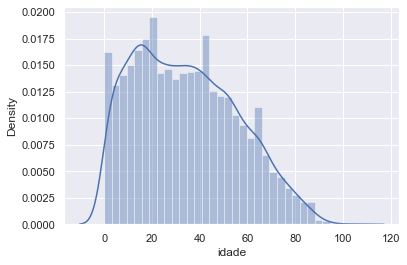

In [84]:
sns.distplot(pnad_df['idade']);

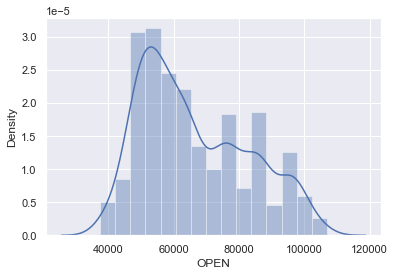

In [85]:
sns.distplot(bolsa_df['OPEN']);

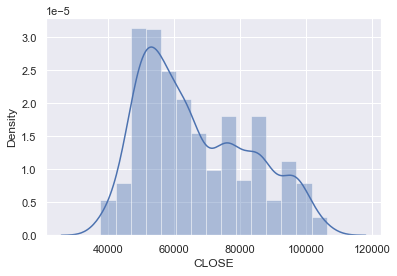

In [86]:
sns.distplot(bolsa_df['CLOSE']);

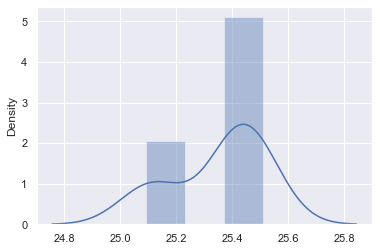

In [87]:
sns.distplot(pd.Series(tempos_grupo3));

## Gráfico de barras ou colunas

Utiliza o plano cartesiano com os valores ou categorias da variável no eixo X
e as frequências ou porcentagens no eixo Y. Para cada valor
da variável desenha-se uma barra com altura correspondendo à sua freqüência ou
porcentagem. Esse tipo de gráfico se adapta bem à variáveis qualitativas (ou
categóricas).

Exemplo de gráficos de barras que representam vendas de carros no primeiro trimestres de 2020. Dois exemplos com os mesmos dados, o primeiro exibe as barras verticalmente, já o segundo horizontalmente.

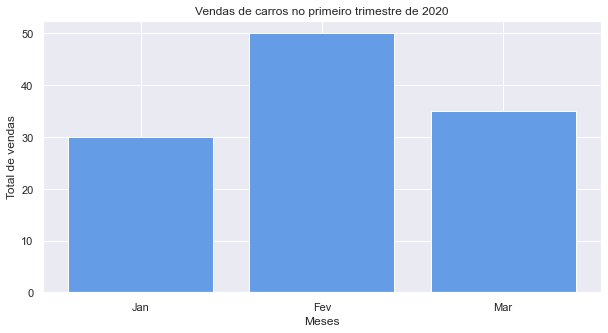

In [88]:
# Define as configurações dos plots
fig,ax1 = plt.subplots(figsize=(10,5)) # tamanho de figura (10,5)
# Dados
ax1.bar( ['Jan','Fev','Mar'],[30,50,35],color='#649DE6')
ax1.set(title="Vendas de carros no primeiro trimestre de 2020", xlabel="Meses", ylabel="Total de vendas")
plt.show()

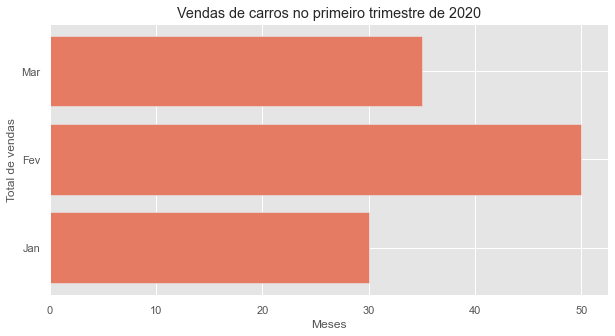

In [89]:
# Define as configurações dos plots
plt.style.use("ggplot") # Define o stilo para ggplot
fig,ax1 = plt.subplots(figsize=(10,5)) # tamanho de figura (10,5)
# Dados
ax1.barh( ['Jan','Fev','Mar'],[30,50,35],color='#E67B64')
ax1.set(title="Vendas de carros no primeiro trimestre de 2020", xlabel="Meses", ylabel="Total de vendas")
plt.show()

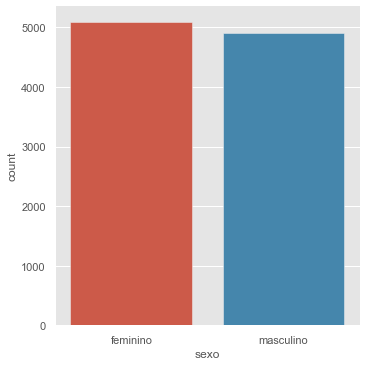

In [90]:
sns.catplot(data=pnad_df, kind='count', x = 'sexo');

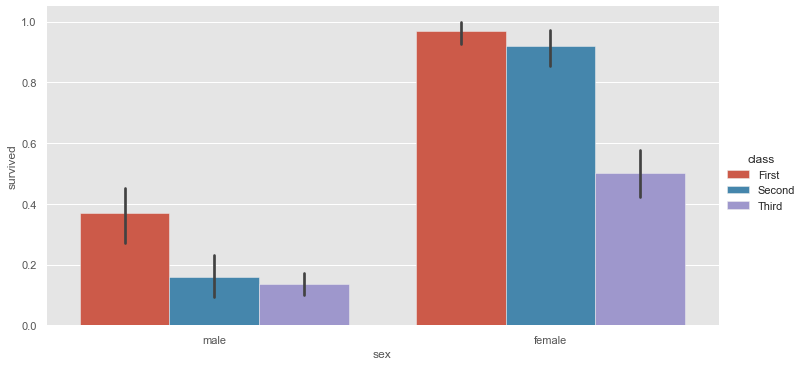

In [91]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic, aspect=2);

## Gráfico de linhas

Sua construção é muito semelhante à do gráfico de barras porém utiliza-se
linhas interligadas ao invés de barras para representar a freqüência ou a
porcentagem de cada valor ou categoria da variável estudada.

É particularmente indicado para retratar séries temporais, ou seja, dados
relativos a variáveis observadas anualmente, mensalmente, trimestralmente, de
hora em hora, diariamente, etc.

No exemplo a seguir o gráfico de linha mostra a evolução e comparação dos valores do dólar, nos meses de janeiro a outubro nos anos de 2019 e 2020 no brasil.

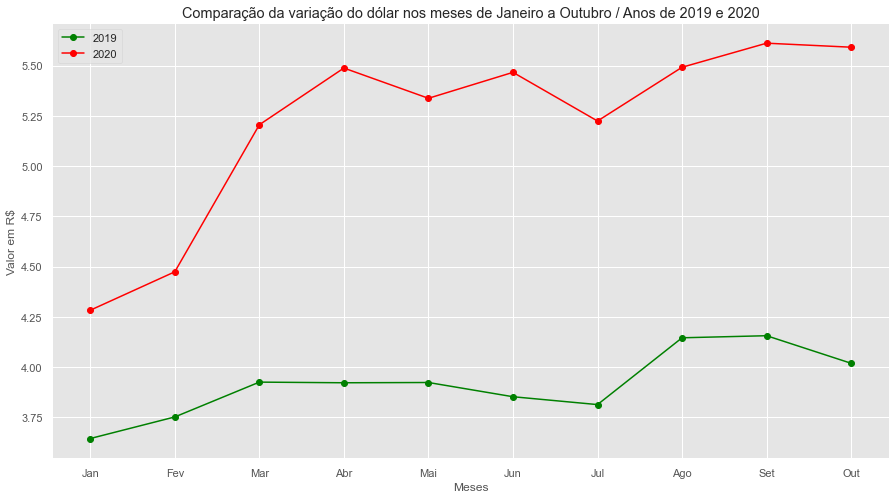

In [92]:
# dados
# https://br.investing.com/currencies/usd-brl-historical-data
meses=['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out']
valores2020=[4.2824,4.4736,5.2053,5.4875,5.3370,5.4661,5.2240,5.4914,5.6112,5.5912]
valores2019=[3.6440,3.7514,3.9247,3.9215,3.9228,3.8520,3.8129,4.1453,4.1556,4.0184]
fig,ax1 = plt.subplots(figsize=(15,8)) # tamanho de figura (15,10)
# plotando valores de 2019
plt.plot(meses, valores2019, label = "2019",marker='o',color='green')
# plotando valores de 2020
plt.plot(meses, valores2020, label = "2020",marker='o',color='red')
#rótulo eixo X
plt.xlabel('Meses')
#rótulo eixo Y
plt.ylabel('Valor em R$')
# Título do gráfico.
plt.title('Comparação da variação do dólar nos meses de Janeiro a Outubro / Anos de 2019 e 2020')
# legenda
plt.legend()
# montagem do gráfico
plt.show()

#dicas
#https://datatofish.com/line-chart-python-matplotlib/

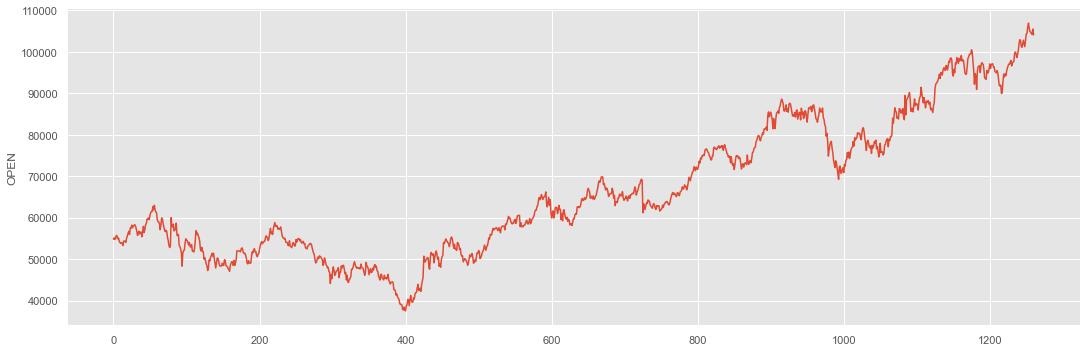

In [93]:
sns.relplot(data=bolsa_df['OPEN'], kind='line', aspect=3);

## Gráficos de setores

É um gráfico muito comum para representar distribuições de freqüências de variáveis qualitativas. É construído repartindo um disco em setores correspondentes às freqüências relativas de cada valor ou categoria. É particularmente útil quando o número de categorias não é grande e as categorias não obedecem a alguma ordem específica. 

Vantagem: todas as informações contidas na tabela de frequências podem ser transportadas para o gráfico.

**Exemplo:** Gráfico de setores que mostra a popularidade das linguagens de programação em Outubro de 2017.

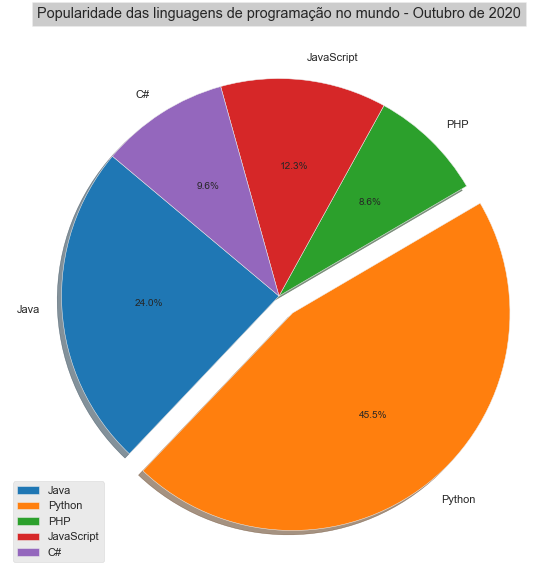

In [94]:
#https://minerandodados.com.br/plotando-graficos-de-forma-facil-com-python/

# Dados
linguagens = ['Java', 'Python', 'PHP', 'JavaScript', 'C#']
popularidade = [16.38, 31.02, 5.83, 8.41, 6.52]
#cores = ['red', 'gold', 'yellowgreen', 'blue', 'lightcoral', 'lightskyblue']
cores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# destaca o segundo elemento do conjunto (Python)
destaque = (0, 0.1, 0, 0, 0)  
# montagem do gráfico
fig = plt.figure(figsize =(15, 10)) # tamanho
plt.pie(popularidade, explode=destaque, labels=linguagens, colors=cores,autopct='%1.1f%%', shadow=True, startangle=140) # outros parâmetros
plt.title("Popularidade das linguagens de programação no mundo - Outubro de 2020", bbox={'facecolor':'0.8', 'pad':5}) # título
plt.legend(linguagens, loc=3) # legendas
plt.show() # exibição

(-1.1276423510427096,
 1.1321050521541118,
 -1.1554662242543934,
 1.1026412539202821)

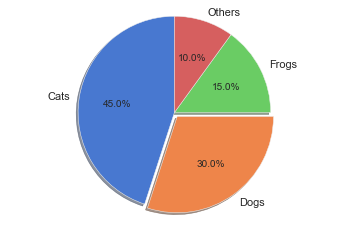

In [95]:
txtLabels = 'Cats', 'Dogs', 'Frogs', 'Others'
fractions = [45, 30, 15, 10]
offsets =(0, 0.05, 0, 0)
plt.pie(fractions, explode=offsets, labels=txtLabels,
autopct='%1.1f%%', shadow=True, startangle=90,
colors=sns.color_palette('muted') )
plt.axis('equal')

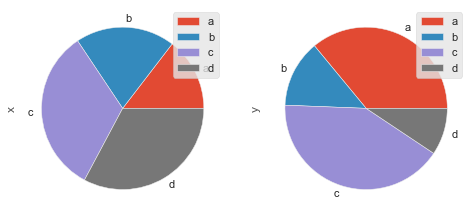

In [96]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], 
                  columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4));

## Boxplot

O **Boxplot** (gráfico de caixa) é um gráfico utilizado para representar dados quantitativos sendo conveniente para revelar medidas de tendência central, dispersão, distribuição dos dados e a presença de outliers (valores discrepantes).



O boxplot é formado pelo **primeiro** e **terceiro** quartil e pela **mediana**. As hastes inferiores e superiores se estendem, respectivamente, do quartil **inferior** até o **menor valor** não inferior ao **limite inferior** e do quartil **superior** até o **maior valor** não superior ao **limite superior**. 

**VARIAÇÃO INTERQUARTIL = Q3-Q1**

Onde **Q3** (terceiro quartil) representa **75%** dos dados e **Q1** (primeiro quartil) representa **25%** dos dados
# IQR = Q3 - Q1

O **desvio padrão** e a **variância** dependem da **média**, e por isso ão **afetados** por valores **extremos**. A **variação interquartil** (IQR em inglês), é uma medida de dispersão baseada na **mediana**, funciona de maneira bem mais **eficiente** na presença de **outliers**, ou seja, é pouco afetada pelo outliers.

Os limites são **calculados** da seguinte forma:

**Limite** **inferior (mínimo)**: $ Q_1-1,5 * (Q_3-Q_1)\ $

**Limite** **superior (máximo)**: $ Q_3+1,5 * (Q_3-Q_1)\ $

Os pontos fora destes limites são considerados valores **discrepantes (outliers)** e são denotados por asterisco (*). A Figura  a seguir apresenta um exemplo do formato de um boxplot.

<center><img src="https://raw.githubusercontent.com/paulosrl/imagens/master/boxplot-1-1024x664.png" height="450px"></center>

Use o Boxplot para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, e para procurar por outliers. Um boxplot funciona melhor quando o tamanho amostral é de pelo menos 20. Por padrão, um boxplot demonstra a mediana, amplitude interquartil, amplitude e outliers para cada grupo.

Fonte: https://support.minitab.com/pt-br/minitab/18/help-and-how-to/graphs/how-to/boxplot/before-you-start/overview/

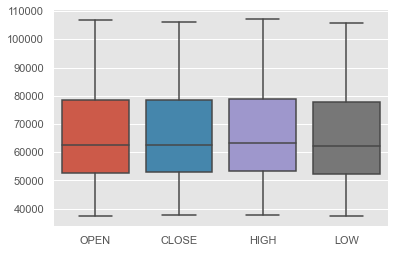

In [97]:
sns.boxplot(data=bolsa_df, order=['OPEN', 'CLOSE', 'HIGH', 'LOW']);

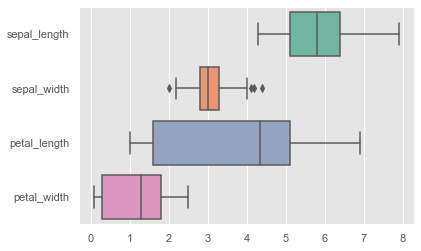

In [98]:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

A forma da distribuição dos dados pode ser analisada por meio do diagrama em caixas de acordo com a figura a seguir, a distribuição amostral pode ser comparada com a distribuição também observada nos histogramas.

![](https://raw.githubusercontent.com/paulosrl/imagens/master/Histogramas.jpg)




## Gráfico de dispersão

O modo padrão de visualizar o relacionamento entre duas variáveis de dados mensuradas.
O eixo $x$ representa uma variável, o eixo $y$, outra, e cada ponto no gráfico é um registro.

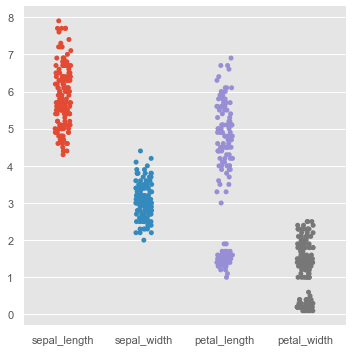

In [99]:
sns.catplot(data=iris);

**Atenção:** abordagem que ajusta os pontos ao longo do eixo categórico usando um algoritmo que os impede de se sobrepor.

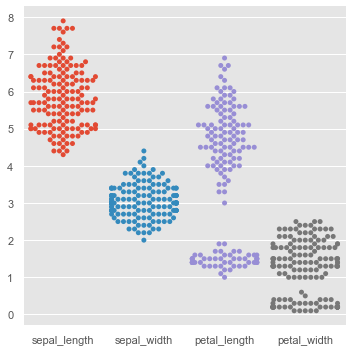

In [100]:
sns.catplot(data=iris, kind='swarm');

---
# Coeficiente de Correlação de Pearson - Parte V
---

O termo correlação representa, sob o ponto de vista da estatística, uma medida de associação entre duas ou mais variáveis. Por definição, se forem considerados numa população, os pares de valores de duas variáveis $(x_{i}, y_{i})$, a correlação pode ser definida da sequinte forma:

$$ \rho = \frac{\displaystyle\sum_{i=1}^{n}(x_{i} - \overline{x})(y_{i} - \overline{y})}{\sqrt{\left[\displaystyle\sum_{i=1}^{n}(x_{i} - \overline{x})^2\right]\left[\displaystyle\sum_{i=1}^{n}(y_{i} - \overline{y})^2\right]}} $$

O valor da correção, conhecido como coeficiente de correlação, assume valores no intervalo de $-1$ a $1$, de acordo com o grau de associação entre as variáveis em questão. Este grau de associação pode ser interpretado da seguinte forma:
- 0,9 a 1 positivo ou negativo indica uma correlação muito forte.
- 0,7 a 0,9 positivo ou negativo indica uma correlação forte.
- 0,5 a 0,7 positivo ou negativo indica uma correlação moderada.
- 0,3 a 0,5 positivo ou negativo indica uma correlação fraca.
- 0 a 0,3 positivo ou negativo indica uma correlação desprezível.

<center>
    <img src="./img/correlacao.png">
</center>


In [101]:
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [102]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [103]:
mpg_df['mpg'].corr(mpg_df['weight'])

-0.831740933244335

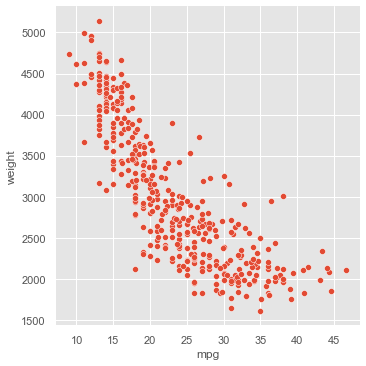

In [104]:
sns.relplot(data=mpg_df, x='mpg', y='weight');

É possível também verificar todas as correlações de forma simultânea.

In [105]:
mpg_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [106]:
mpg_df.corr().style.background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


## **Estudo de caso**

### **Análise exploratória de dados do ENEM 2019**

Neste estudo de caso será analisada os microdados da ENEM 2019.

Serão analisados:

* Estrutura dos dados;
* Resumo estatístico dos dados;
* Histogramas;
* Boxplots;
* Análises das variáveis qualitativas e quantitativas;
* Cálculo de frequencias absolutas e relativas.

Os dados estão disponíveis no site no INEP, junto a outros datasets disponibilizados
https://download.inep.gov.br/microdados/microdados_enem_2019.zip

In [107]:
#caminhop do arquivo
enem = pd.read_csv("./dados/MICRODADOS_ENEM_2019_SAMPLE.csv", 
                   encoding='latin-1', 
                   sep=';')

In [108]:
# Primeiras linhas do DataFrame
enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,0,190001595656,2019,3552205,Sorocaba,35,SP,36,M,1,...,A,A,A,A,A,A,C,A,C,B
1,1,190001421546,2019,2910800,Feira de Santana,29,BA,23,M,1,...,A,A,A,B,A,A,E,A,A,B
2,2,190001133210,2019,2304400,Fortaleza,23,CE,39,F,1,...,A,A,A,B,A,A,C,A,A,B
3,3,190001199383,2019,1721000,Palmas,17,TO,25,F,1,...,A,A,A,C,A,B,D,A,B,B
4,4,190001237802,2019,3118601,Contagem,31,MG,22,F,1,...,B,A,A,B,A,A,C,B,B,B


In [109]:
# Visualizando as colunas
enem.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', '

In [110]:
# Visualizando a quantidade de dados por estado
enem['SG_UF_RESIDENCIA'].value_counts()

SP    164
BA    117
MG    108
PE     67
CE     66
RJ     57
RS     42
PA     40
GO     35
MA     35
PR     33
DF     30
PB     26
RN     25
SC     23
ES     20
PI     18
AL     16
SE     16
AM     15
MT     12
TO     11
MS      9
AP      6
RO      4
AC      4
RR      1
Name: SG_UF_RESIDENCIA, dtype: int64

In [111]:
# Visualizando o menor e a maior idade
print('O aluno mais novo deste dataset tem {} anos e o mais velho {} anos'.format(
    enem['NU_IDADE'].min(), enem['NU_IDADE'].max())
)


O aluno mais novo deste dataset tem 15 anos e o mais velho 72 anos


In [112]:
# Visualizando as estatisticas descritivas basicas
enem['NU_IDADE'].describe()

count    1000.000000
mean       24.033000
std         7.521601
min        15.000000
25%        19.000000
50%        22.000000
75%        27.000000
max        72.000000
Name: NU_IDADE, dtype: float64

In [113]:
#Tratando os dados categóricos para o sexo
#Visializando os valores da coluna
enem['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [114]:
enem['TP_SEXO'] = enem['TP_SEXO'].map({'M':'Masculino', 'F':'Feminino'})

In [115]:
enem['TP_SEXO'].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [116]:
#Tratando os dados categóricos para a raça
enem['TP_COR_RACA'] = enem['TP_COR_RACA'].map({0:'NA', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})

In [117]:
enem['TP_COR_RACA'].unique()

array(['Parda', 'Branca', 'Preta', 'Amarela', 'NA', 'Indígena'],
      dtype=object)

## Número de candidatos inscritos por estado

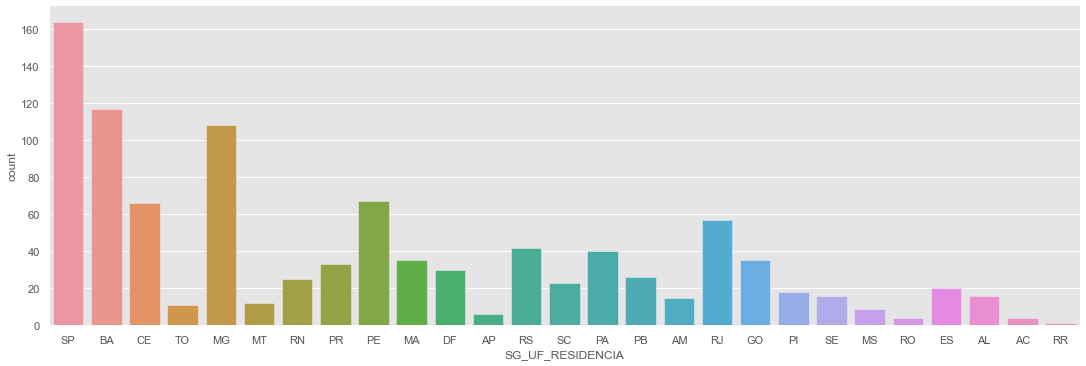

In [118]:
sns.catplot(data=enem, kind='count', x = 'SG_UF_RESIDENCIA', aspect=3);

## Histograma do Número de Candidatos inscritos por Sexo e idade

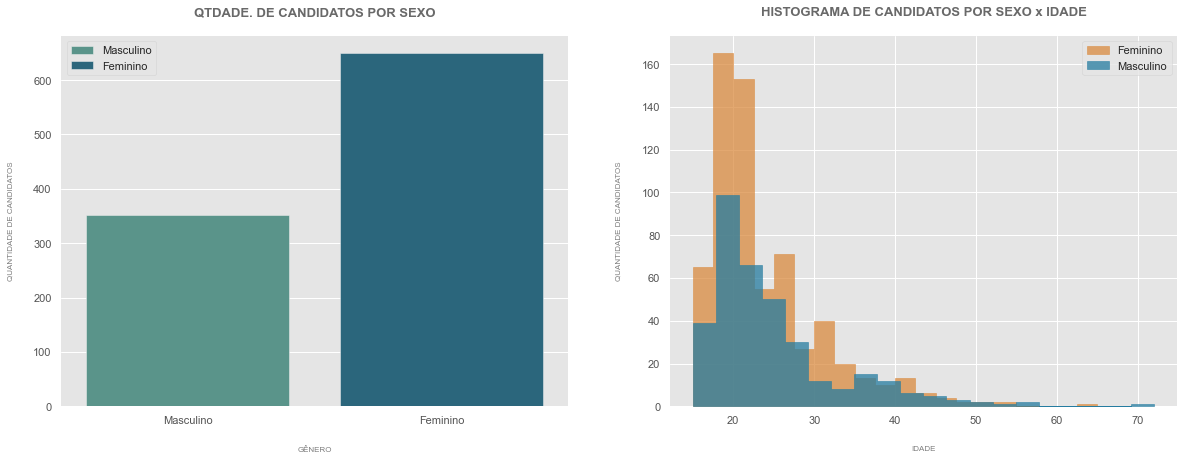

In [119]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(
    x = 'TP_SEXO', 
    data = enem,
    palette = 'crest', 
    hue = 'TP_SEXO', 
    dodge = False
)

s1 = plt.title(
    'QTDADE. DE CANDIDATOS POR SEXO',
    pad = 20,
    fontsize = 13, 
    color ='dimgrey', 
    fontweight = 'bold'
)

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=2, labels=['Masculino', 'Feminino'])

s2 = plt.subplot(2, 2, 2)

sns.histplot(
    enem[enem['TP_SEXO'] == 'Feminino']['NU_IDADE'], 
    bins = 20, 
    label = 'Feminino', 
    element = 'step',
    color = '#da8b40'
)

sns.histplot(
    enem[enem['TP_SEXO'] == 'Masculino']['NU_IDADE'], 
    bins = 20, 
    label = 'Masculino', 
    element = 'step',
    color = '#257ca0'
)


s2 = plt.title(
    'HISTOGRAMA DE CANDIDATOS POR SEXO x IDADE', 
    pad = 20,
    fontsize = 13, 
    color ='dimgrey', 
    fontweight = 'bold'
)

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


## Histograma do Número de Candidatos inscritos por Raça

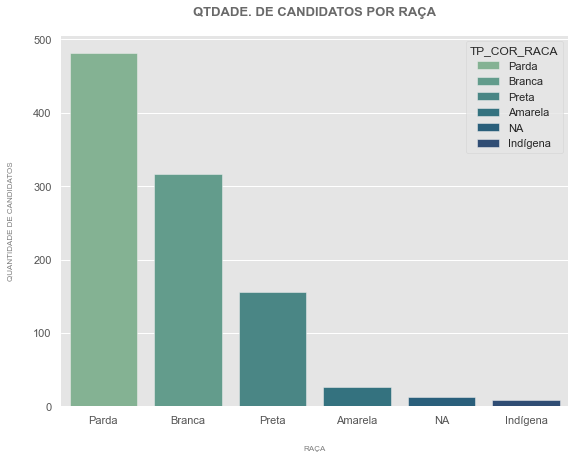

In [120]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(
    x = 'TP_COR_RACA', 
    data = enem,
    palette = 'crest', 
    hue = 'TP_COR_RACA', 
    dodge = False
)

s1 = plt.title(
    'QTDADE. DE CANDIDATOS POR RAÇA',
    pad = 20,
    fontsize = 13, 
    color ='dimgrey', 
    fontweight = 'bold'
)

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('RAÇA', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)

## NOTAS

In [121]:
# Media
enem['NU_NOTA_REDACAO'].mean()

585.1162790697674

In [122]:
# Desvio padrao
enem['NU_NOTA_REDACAO'].std()

176.05597302772327

In [123]:
# Selecionando somente as colunas de notas
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# Visualizando as estatisticas descritivas basicas
enem[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,683.000000,731.000000,683.000000,731.000000,731.000000
mean,478.582430,514.857319,516.778624,527.165253,585.116279
std,70.767548,76.069041,103.985196,55.682382,176.055973
min,329.600000,325.400000,360.400000,329.100000,0.000000
25%,423.450000,463.650000,432.950000,495.550000,500.000000
50%,477.500000,522.400000,495.900000,530.800000,580.000000
75%,527.450000,569.900000,587.550000,567.350000,670.000000
max,688.900000,744.700000,882.000000,649.100000,980.000000


## Gráfico com a distribuição das notas dos alunos inscritos

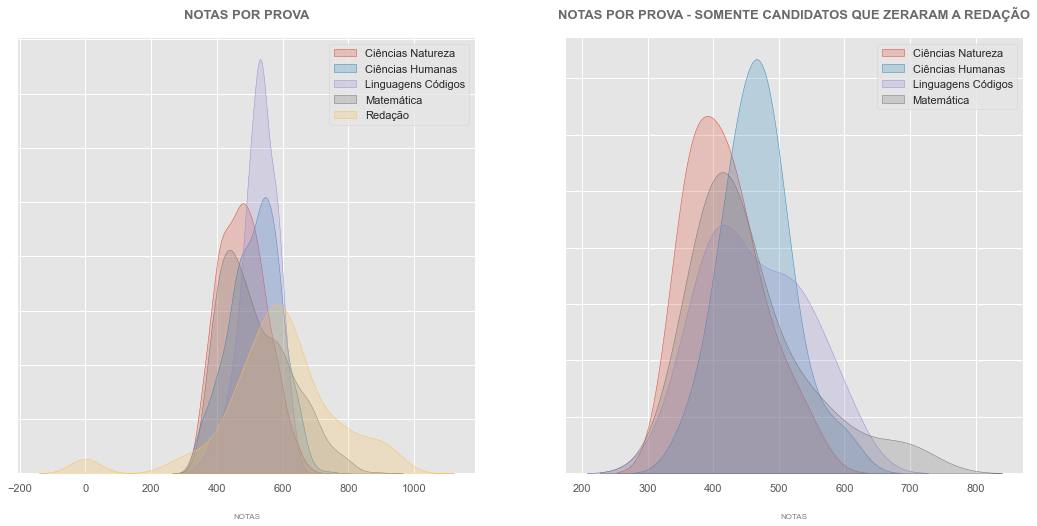

In [124]:
plt.figure(figsize=(18,8))

ax = plt.subplot(1, 2, 1)

sns.kdeplot(enem['NU_NOTA_CN'], label = 'Ciências Natureza', shade = True)
sns.kdeplot(enem['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(enem['NU_NOTA_LC'], label = 'Linguagens Códigos', shade = True)
sns.kdeplot(enem['NU_NOTA_MT'], label = 'Matemática', shade = True)
sns.kdeplot(enem['NU_NOTA_REDACAO'], label = 'Redação', shade = True)


plt.title(
    'NOTAS POR PROVA',
    pad = 20,
    fontsize = 13, 
    color ='dimgrey', 
    fontweight = 'bold'
)

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax.tick_params(axis ='y', labelsize=0, length = 0)
ax.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend()

ax2 = plt.subplot(1, 2, 2)

sns.kdeplot(enem[enem['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CN'], label = 'Ciências Natureza', shade = True)
sns.kdeplot(enem[enem['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(enem[enem['NU_NOTA_REDACAO'] == 0]['NU_NOTA_LC'], label = 'Linguagens Códigos', shade = True)
sns.kdeplot(enem[enem['NU_NOTA_REDACAO'] == 0]['NU_NOTA_MT'], label = 'Matemática', shade = True)


plt.title(
    'NOTAS POR PROVA - SOMENTE CANDIDATOS QUE ZERARAM A REDAÇÃO',
    pad = 20,
    fontsize = 13, 
    color ='dimgrey', 
    fontweight = 'bold'
)

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax2.tick_params(axis ='y', labelsize=0, length = 0)
ax2.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend()

## Distribuição das notas de Matemática pela renda

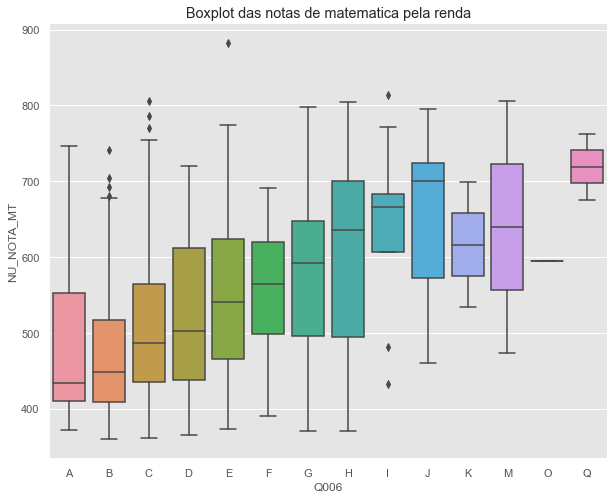

In [125]:
renda_ordenada = enem['Q006'].unique()
renda_ordenada.sort()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Q006', y = 'NU_NOTA_MT', data = enem, order = renda_ordenada)
plt.title('Boxplot das notas de matematica pela renda');

## Gráfico de dispersão entre a nota da redação e de matemática

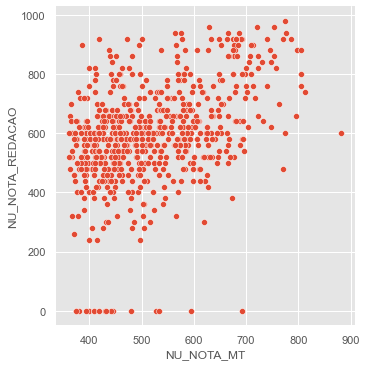

In [126]:
sns.relplot(data=enem, x='NU_NOTA_MT', y='NU_NOTA_REDACAO');

## Gráfico de dispersão entre a nota da redação e de linguagens

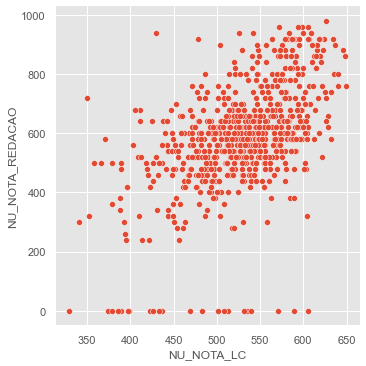

In [127]:
sns.relplot(data=enem, x='NU_NOTA_LC', y='NU_NOTA_REDACAO');

## Analisando a distribuicao de notas totais

In [128]:
# Somando as colunas
enem[provas].sum()

NU_NOTA_CN         326871.8
NU_NOTA_CH         376360.7
NU_NOTA_MT         352959.8
NU_NOTA_LC         385357.8
NU_NOTA_REDACAO    427720.0
dtype: float64

In [129]:
# Somando as linhas
enem['NU_NOTA_TOTAL'] = enem[provas].sum(axis=1)
enem.head(3)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,0,190001595656,2019,3552205,Sorocaba,35,SP,36,Masculino,1,...,A,A,A,A,A,C,A,C,B,0.0
1,1,190001421546,2019,2910800,Feira de Santana,29,BA,23,Masculino,1,...,A,A,B,A,A,E,A,A,B,0.0
2,2,190001133210,2019,2304400,Fortaleza,23,CE,39,Feminino,1,...,A,A,B,A,A,C,A,A,B,0.0


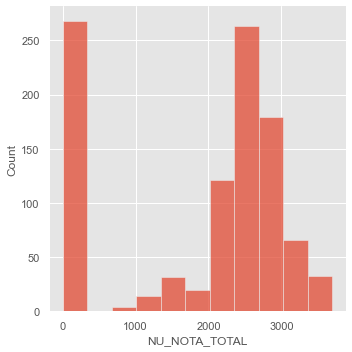

In [130]:
sns.displot(enem, x='NU_NOTA_TOTAL');

In [131]:
provas.append('NU_NOTA_TOTAL')
enem[provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,0.0
7,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
982,NaN,NaN,NaN,NaN,NaN,0.0
991,NaN,NaN,NaN,NaN,NaN,0.0
994,NaN,NaN,NaN,NaN,NaN,0.0
995,NaN,NaN,NaN,NaN,NaN,0.0


In [132]:
# Criando variavel para excluir os alunos com nota <> de 0
dados_sem_nota_zero = enem.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
3,3,190001199383,2019,1721000,Palmas,17,TO,25,Feminino,1,...,A,A,C,A,B,D,A,B,B,2376.7
4,4,190001237802,2019,3118601,Contagem,31,MG,22,Feminino,1,...,A,A,B,A,A,C,B,B,B,3196.8
5,5,190001782198,2019,5107602,Rondonópolis,51,MT,37,Masculino,2,...,A,A,B,A,A,E,A,B,B,3248.1
6,6,190001421548,2019,2924009,Paulo Afonso,29,BA,22,Feminino,1,...,A,A,B,A,A,B,A,A,A,2674.9
9,9,190001592266,2019,3550308,São Paulo,35,SP,17,Masculino,1,...,A,A,B,A,B,C,B,B,B,2475.2


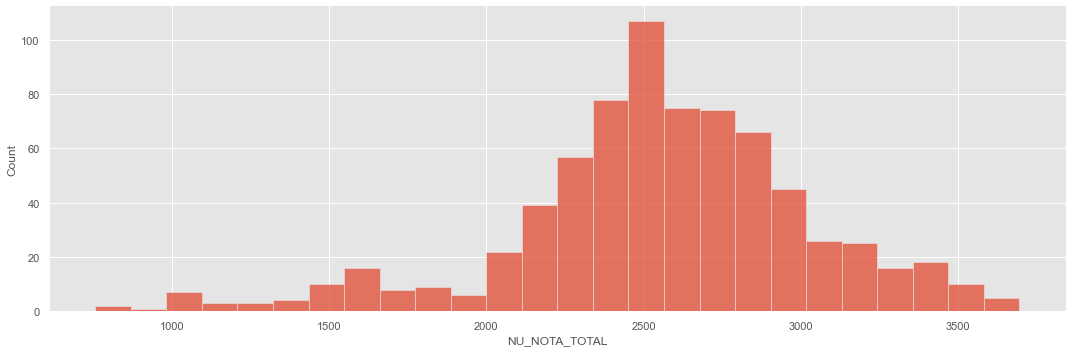

In [133]:
sns.displot(dados_sem_nota_zero, x='NU_NOTA_TOTAL', aspect = 3);

## Distribuição da nota total pelo sexo

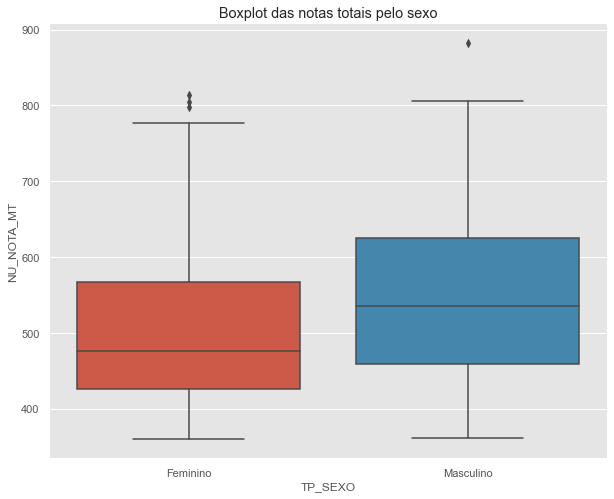

In [134]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='TP_SEXO', y = 'NU_NOTA_MT', data = dados_sem_nota_zero)
plt.title('Boxplot das notas totais pelo sexo');

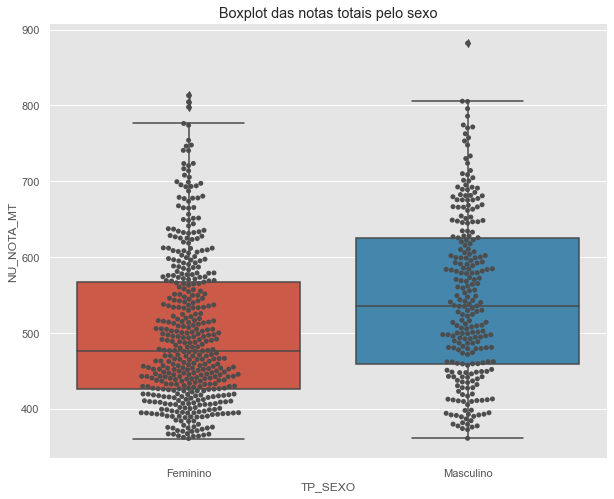

In [135]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='TP_SEXO', y = 'NU_NOTA_MT', data = dados_sem_nota_zero)
ax = sns.swarmplot(x="TP_SEXO", y = "NU_NOTA_MT", data = dados_sem_nota_zero, color=".3");
plt.title('Boxplot das notas totais pelo sexo');

In [136]:
nota_redaca_linguagem_sem_nota_zero = enem.query('NU_NOTA_REDACAO != 0 & NU_NOTA_LC != 0')
nota_redaca_linguagem_sem_nota_zero.head()


,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,0,190001595656,2019,3552205,Sorocaba,35,SP,36,Masculino,1,...,A,A,A,A,A,C,A,C,B,0.0
1,1,190001421546,2019,2910800,Feira de Santana,29,BA,23,Masculino,1,...,A,A,B,A,A,E,A,A,B,0.0
2,2,190001133210,2019,2304400,Fortaleza,23,CE,39,Feminino,1,...,A,A,B,A,A,C,A,A,B,0.0
3,3,190001199383,2019,1721000,Palmas,17,TO,25,Feminino,1,...,A,A,C,A,B,D,A,B,B,2376.7
4,4,190001237802,2019,3118601,Contagem,31,MG,22,Feminino,1,...,A,A,B,A,A,C,B,B,B,3196.8


<Figure size 720x576 with 0 Axes>

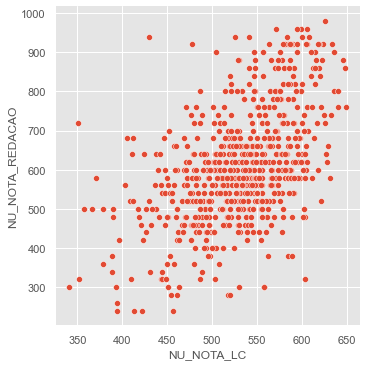

In [137]:
plt.figure(figsize=(10, 8))
ax = sns.relplot(x="NU_NOTA_LC", y = "NU_NOTA_REDACAO", data = nota_redaca_linguagem_sem_nota_zero);

## Distribuição da nota total pela raça

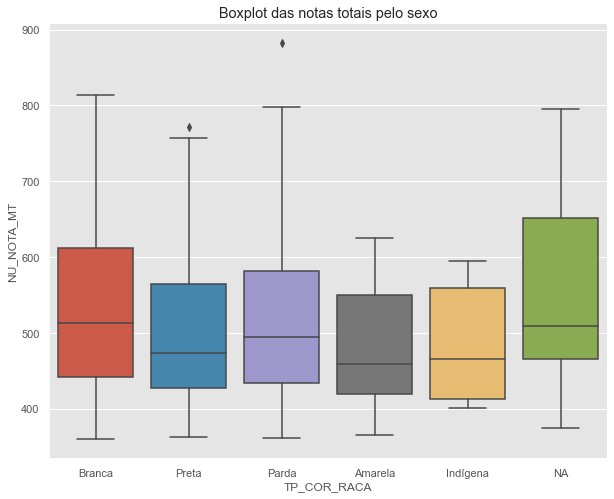

In [138]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MT', data = dados_sem_nota_zero)
plt.title('Boxplot das notas totais pelo sexo');

---

__Licensa__

![](https://drive.google.com/uc?export=view&id=1Uq7UxJPT9ytP0ABv8hYNWo9ciDZB7guX)

*This work is licensed under the Creative Commons Attribution-NonCommercial 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.*